In [1]:
#Section 1: Implementing KNN

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [3]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [4]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [5]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

In [6]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

In [7]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [9]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


In [10]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


**Task:**

Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances, instead of just the output that was most common. You don't need to find out accuracy, just modify the function and return the k-nearest neighbours and distances.

In [21]:
import numpy as np

def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        distance = np.sqrt(np.sum(np.square(X_test - X_train[i, :])))
        distances.append((distance, i))

    distances = sorted(distances, key=lambda x: x[0])

    for i in range(k):
        index = distances[i][1]
        targets.append((y_train[index], distances[i][0]))

    return targets

def k_nearest_neighbor(X_train, y_train, X_test, k):
    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    predictions = []
    for i in range(len(X_test)):
        neighbors = predict(X_train, y_train, X_test[i, :], k)
        predictions.append(neighbors)

    return np.asarray(predictions)

dist = k_nearest_neighbor(X_train, y_train, X_test, 9)
print(dist)


[[[0.         0.34641016]
  [0.         0.38729833]
  [0.         0.41231056]
  [0.         0.45825757]
  [0.         0.45825757]
  [0.         0.46904158]
  [0.         0.47958315]
  [0.         0.51961524]
  [0.         0.51961524]]

 [[1.         0.2       ]
  [1.         0.24494897]
  [1.         0.33166248]
  [2.         0.43588989]
  [1.         0.48989795]
  [1.         0.5       ]
  [1.         0.51961524]
  [1.         0.54772256]
  [1.         0.57445626]]

 [[2.         0.24494897]
  [2.         0.36055513]
  [2.         0.36055513]
  [2.         0.37416574]
  [2.         0.42426407]
  [2.         0.57445626]
  [2.         0.57445626]
  [2.         0.59160798]
  [2.         0.6164414 ]]

 [[1.         0.17320508]
  [1.         0.2236068 ]
  [1.         0.26457513]
  [1.         0.36055513]
  [1.         0.42426407]
  [1.         0.51961524]
  [1.         0.55677644]
  [1.         0.678233  ]
  [1.         0.7       ]]

 [[2.         0.17320508]
  [2.         0.28284271]
  [2

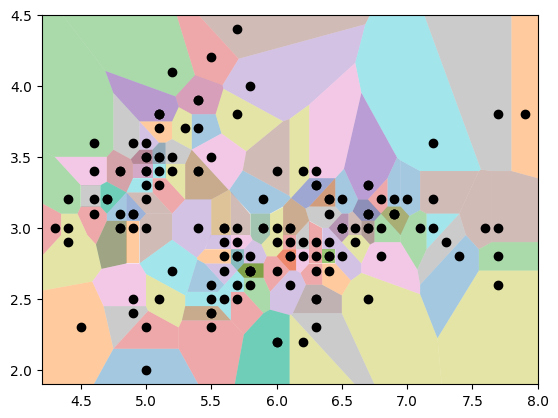

In [24]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

In [25]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


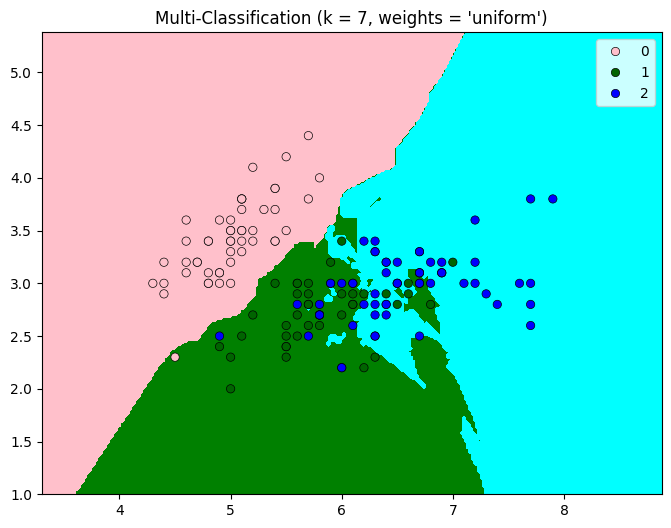

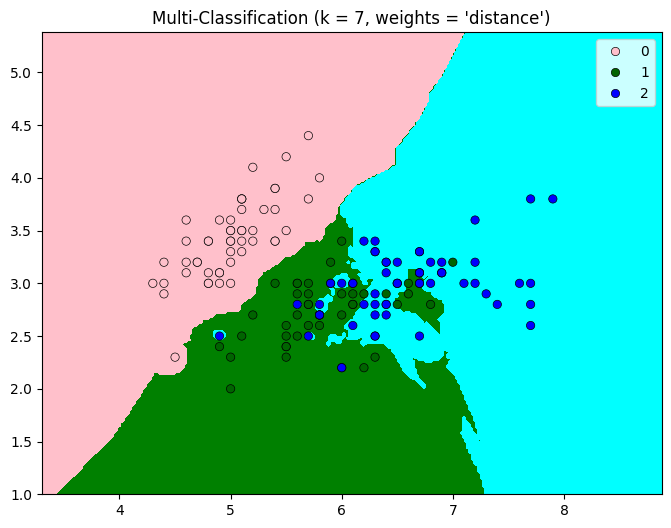

In [26]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

**Task 2:**
- In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries by only considering two attributes of the dataset. You must be already familiar with PCA.
- Apply PCA on the dataset above to reduce it to two dimensions.
- Plot the Voronoi diagram and Decision boundaries after that.

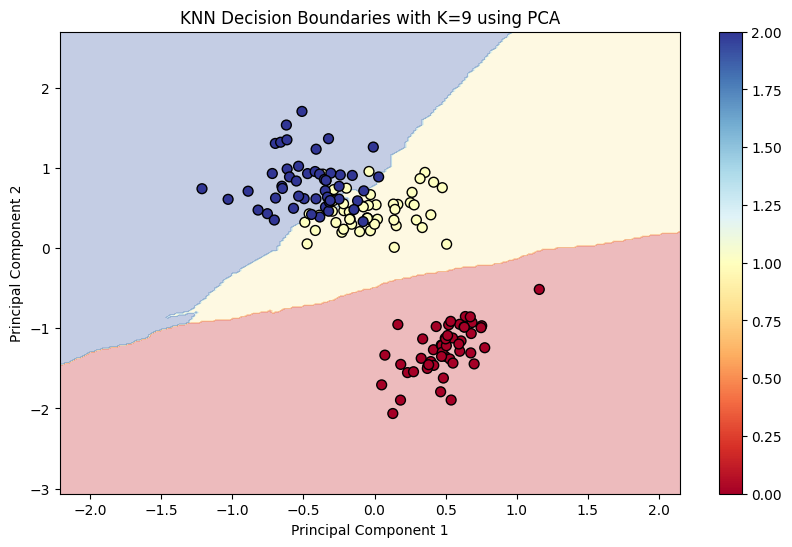

In [35]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        cov = np.cov(X.T)

        evalue, evector = np.linalg.eig(cov)
        eigenvectors = evector.T

        idxs = np.argsort(evalue)[::-1]
        evalue = evalue[idxs]
        evector = evector[idxs]
        self.components = evector[0:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

# Apply PCA
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

# Extract the PCA components
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

# Create a KNN classifier
k = 9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_projected, y)

# ToCreate a mesh grid for plotting decision boundaries
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicting on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Plotting the PCA-reduced data points
scatter = plt.scatter(x1, x2, c=y, edgecolor='k', cmap=plt.cm.RdYlBu, s=50)
plt.title(f'KNN Decision Boundaries with K={k} using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)

plt.show()

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

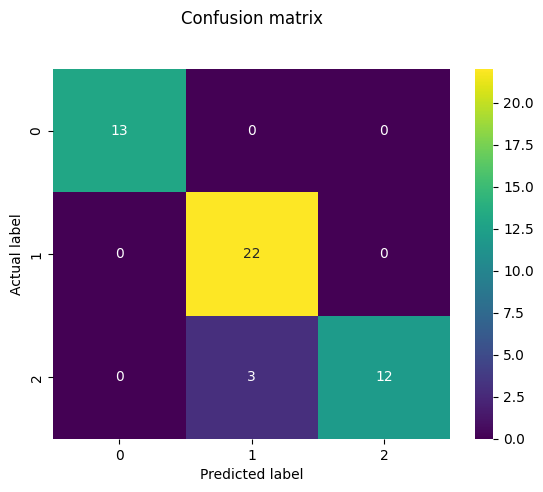

In [38]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



**Car Evaluation Dataset**

In [40]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [41]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [42]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [43]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


**Task-3**

- Plot a Confusion Matrix for the results of the Car evaluation dataset

Text(0.5, 23.52222222222222, 'Predicted label')

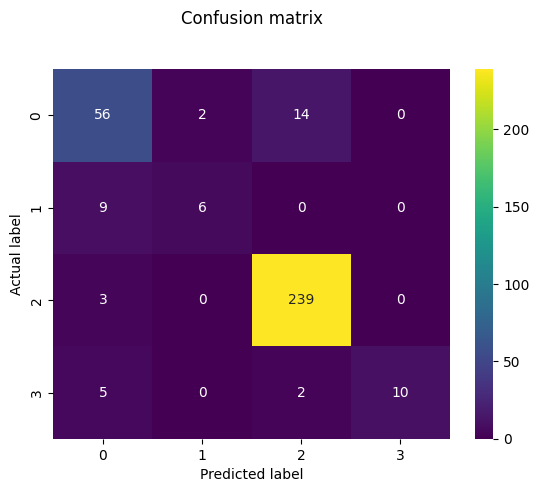

In [49]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Task-4**

- Print a Classification Report for the results of the Car evaluation dataset

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77        72
           1       0.75      0.40      0.52        15
           2       0.94      0.99      0.96       242
           3       1.00      0.59      0.74        17

    accuracy                           0.90       346
   macro avg       0.86      0.69      0.75       346
weighted avg       0.90      0.90      0.89       346



**Task-5**

- Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

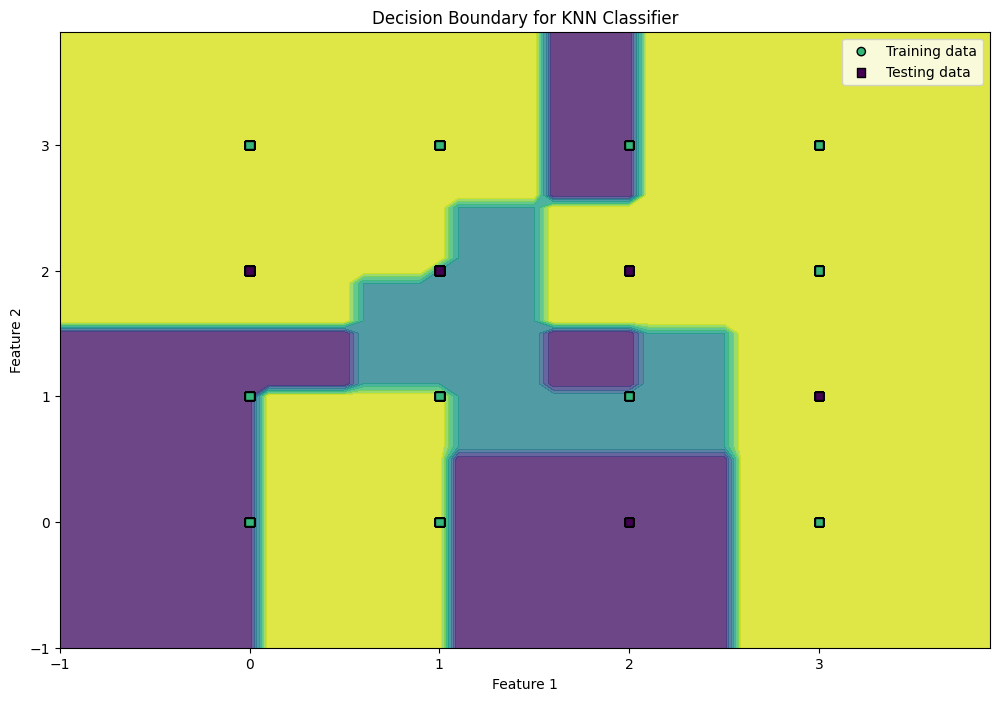

In [61]:
# Plotting the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')

# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Testing data')

plt.title('Decision Boundary for KNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Task-6**
- Plot the Voronoi diagram for the classifier of the Car evaluation dataset

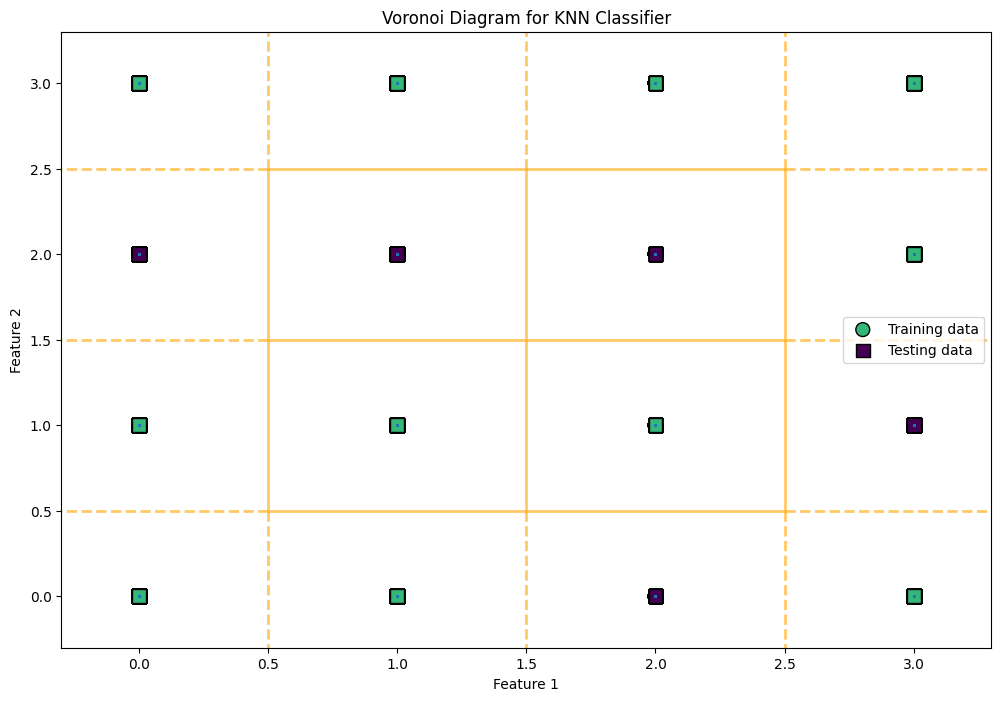

In [60]:
# Voronoi diagram
vor = Voronoi(X_train)

# Create a Voronoi plot
plt.figure(figsize=(12, 8))
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=2)

# Plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Training data', s=100)
# Plot testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Testing data', s=100)

plt.title('Voronoi Diagram for KNN Classifier')
plt.xlabel('Feature 1')  # Replace with actual feature name
plt.ylabel('Feature 2')  # Replace with actual feature name
plt.legend()
plt.show()

**Questions:**

**Q1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.**  
- From the section on decision boundaries; we can observe weights set to uniform and the other being weights set to distance.
- In the case of **weights set to 'uniform'**, all the nearest neighbors count the same when making a prediction. This works well when the neighbors are evenly spread out, treating **each neighbor equally**.
-On the other hand, in the case of **weights set to 'distance'**, **closer neighbors matter more** when predicting. The closer they are, the more influence they have, which helps the model pay attention to nearby points and local patterns in the data.

**Q2. What do you think could be the drawbacks of using KNN?**
- **Choosing optimal valueof'k':** The choice of number of neighbors(k) is important and finding the right value can be challenging. Usually we use trial and error, or refer to research papers in the respective domain.
- **Slow with Large Datasets:** KNN can be slow because it calculates distances to all training points every time it makes a prediction.
- **High Memory Use:** It needs a lot of memory since it stores all the training data, which can be a problem with big datasets.
- **Does not work well with high dimensions:** As the number of features increases, KNN finds it harder to identify meaningful neighbors.
